In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Анализ тарифных планов 

<p><b>Цель исследования</b> - выбор оптимального тарифа мобильного оператора.<p>

<p><b>Задачи:</b><p>
<p><b> 1. Провести анализ поведения абонентов мобильного оператора.</b>    
<p>1.1 Определить сколько <b>каждый абонент</b> в месяц:
<p>а) Совершает звонков.<p>
<p>б) Расходует минут на разговоры.<p>
<p>в) Отправляет сообщений.<p>
<p>г) Расходует интернет-трафика.<p>
<p>2.1 Определить выручку <b>на одного</b> клиента в месяц:    
<p><b> 2. Провести анализ поведения абонентов на двух тарифных планах "Смарт", "Ультра".</b>    
<p>1.1 Определить количество, необходимых клиенту в месяц, на тарифных планах "Смарт" и "Ультра":
    <p>а) Минут. <p>
    <p>б) Сообщений.<p>  
    <p>в) Объема интернет-трафика.<p>
<p>3. Провести анализ средней выручки пользователей на двух тарифах - "Смарт" и "Ультра":
<p>4. Провести анализ средней выручки пользователей в Москве и других регионах.   

<h1>Содержание<span class="tocSkip"></span></h1>

[1. Изучение данных из файла и обработка](#1)

   - [1.1 Таблица users](#1.1)
   - [1.2 Таблица calls](#1.2)
   - [1.3 Таблица messages](#1.3)
   - [1.4 Таблица internet](#1.4)
   - [Вывод](#1.6) 
   
[2. Анализ поведения абонентов мобильного оператора](#2)
   - [2.1 Предварительная подготовка данных](#2.1)
   - [2.2 Группировка данных](#2.2)
   - [2.3 Расчет ежемесячной выручки](#2.3)

[3. Анализ поведения абонентов мобильного оператора на тарифных планах "Смарт" и "Ультра"](#3)
   - [3.1 Колличество минут необходимое абоненту](#3.1)
   - [3.2 Статистические показатели по тарифным планам Смарт и Ультра ](#3.2)
   - [3.3 Гистограммы распределения](#3.3)

[4. Проверка гипотез](#4)
   - [4.1 Гипотеза №1 "Средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются"](#4.1)
   - [4.2 Гипотеза №2	"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"](#4.2)
   
[5. Вывод](#5)


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Молодец, что добавил цель исследования, расписал задачи и сделал содержание. </div>

## 1. Изучение данных из файла и обработка <a class="anchor" id="1"></a>

In [1]:
# Импортируем библиотеки необходимые для работы
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy import stats as st
from functools import reduce
import seaborn as sns

In [3]:
# создадим DataFrame
users = pd.read_csv(
    "users.csv"
)  # в переменную users помещаем значение таблицы users.csv
calls = pd.read_csv(
    "calls.csv"
)  # в переменную calls помещаем значение таблицы calls.csv
messages = pd.read_csv(
    "messages.csv"
)  # в переменную messages помещаем значение таблицы messages.csv
internet = pd.read_csv(
    "internet.csv", index_col=0
)  # в переменную internet помещаем значение таблицы internet.csv
tariffs = pd.read_csv(
    "tariffs.csv"
)  # в переменную tariffs помещаем значение таблицы tariffs.csv

<IPython.core.display.Javascript object>

### 1.1 Таблица users <a class="anchor" id="1.1"></a>

In [3]:
# выведем первые 5 строчек на экран
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
# выведем информацию о таблице
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
# Проверю уникальные значения
users.nunique()

user_id       500
age            58
churn_date     33
city           76
first_name    246
last_name     419
reg_date      270
tariff          2
dtype: int64

In [6]:
# Прверю дубликаты
users.duplicated().sum()

0

Вывод:

В таблице users содержатся данные по абонентам, всего абонентов 500. 

Дубликатов нет. 

В столбце *churn_date* имеются пропущенные значения, но по условию задачи пропущенные значения - абнонет пользуется тарифом. 

В столбцах churn_date, reg_date надо изменить тип данных на date. 

Преобразуем данные

In [7]:
users["churn_date"] = pd.to_datetime(users["churn_date"], format="%Y-%m-%dT")
users["reg_date"] = pd.to_datetime(users["reg_date"], format="%Y-%m-%dT")

### 1. 2 Таблица calls <a class="anchor" id="1.2"></a>

In [8]:
# выведем первые 5 строчек на экран
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [9]:
# выведем информацию о таблице
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
# Проверю уникальные значения
calls.nunique()

id           202607
call_date       365
duration       2871
user_id         492
dtype: int64

In [11]:
# Проверю дубликаты
calls.duplicated().sum()

0

Вывод:

В таблице пропущенных значений нет, всего 202607 значений. Данные по звонкам скорее всего предсттавлены за год, так как в столбце call_date 365 уникальных значений, но дальше мы это проверим. 

Колличесвто уникальных id абонентов здесь меньше, значит скорее всего 8 абонентов не совершает звонков. Дубликатов нет. 

Тип столбца call_date необходимо преоразовать из object в date, в столбцах duration, user_id можно заменить тип данных на 32 разярдный - будет занимать меньше места). 

Преобразуем данныe

In [12]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format="%Y-%m-%dT")
calls["duration"] = calls["duration"].astype("float32")
calls["user_id"] = calls["user_id"].astype("int32")

### 1.3 Таблица messages <a class="anchor" id="1.3"></a>

In [13]:
# выведем первые 5 строчек на экран
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
# выведем информацию о таблице
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [15]:
# Проверю уникальные значения
messages.nunique()

id              123036
message_date       364
user_id            426
dtype: int64

In [16]:
# Проверю дубликаты
messages.duplicated().sum()

0

**Вывод:**

В таблице пропущенных значений нет, всего 123036 записей. Данные по сообщениям скорее всего предсттавлены за год (но почему-то на один день меньше), так как в столбце message_date 364 уникальных значений. 

Колличесвто уникальных id абонентов здесь меньше, значит скорее всего 74 абонента не отправляет сообщений. Дубликатов нет. 

Тип столбца message_date необходимо преоразовать из object в date, в столбце user_id можно заменить тип данных на 32 разярдный. 

**Преобразуем данныe**

In [17]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format="%Y-%m-%dT")
messages["user_id"] = messages["user_id"].astype("int32")

### 1.4 Таблица internet <a class="anchor" id="1.4"></a>

In [18]:
# выведем первые 5 строчек на экран
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [19]:
# выведем информацию о таблице
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [20]:
# проверю уникальные значения
internet.nunique()

Unnamed: 0      149396
id              149396
mb_used          70003
session_date       365
user_id            497
dtype: int64

In [21]:
# Проверю дубликаты
internet.duplicated().sum()

0

**Вывод:**

В таблице пропущенных значений нет, всего 149396 записей. Данные по интернет трафику скорее всего предсттавлены за год, так как в столбце session_date 365 уникальных значений, но дальше мы это проверим. 

Колличесвто уникальных id абонентов здесь меньше, значит скорее всего 3 абонента не пользуются интернетом. Дубликатов нет. 

Тип столбца session_date необходимо преоразовать из object в date, в столбцах mb_used, user_id можно заменить тип данных на 32 разярдный - будет занимать меньше места). 

Столбец  Unnamed: 0 удалим так как данные в столбце дублируют значения индекса фрейма.

**Преобразуем данныe**

In [22]:
internet["session_date"] = pd.to_datetime(internet["session_date"], format="%Y-%m-%dT")
internet["user_id"] = internet["user_id"].astype("int32")
internet["mb_used"] = internet["mb_used"].astype("float32")

### 1.5 Таблица tariffs <a class="anchor" id="1.5"></a>

In [23]:
# выведем значения на экран
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
# выведем информацию о таблице
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [25]:
# Проверю уникальные значения
tariffs.nunique()

messages_included        2
mb_per_month_included    2
minutes_included         2
rub_monthly_fee          2
rub_per_gb               2
rub_per_message          2
rub_per_minute           2
tariff_name              2
dtype: int64

In [26]:
# Проверю дубликаты
tariffs.duplicated().sum()

0

Вывод - в таблице пропущенных значений нет, всего 2 записи. которые содержат данные о тарифах. Данные преобработки не требуют. 

### Общий вывод:  <a class="anchor" id="1.6"></a>
- Таблицы содержат данные по активности **500** абонентов мобильного оператора. Данные представлены за год. 
- В таблицах **users, calls, messages, internet** в столбцах, где указана дата, тип переменных следует заменить на date.
- 8 абонентов не совершает звонков, 74 абонента не отправляют сообщений, а 3 не пользуются интернетом.

## 2. Анализ поведения абонентов мобильного оператора <a class="anchor" id="2"></a>

### 2.1 Предварительная подготовка данных <a class="anchor" id="2.1"></a>

В таблице calls округлим значения в столбце duration в большую сторону так как секунды в звонках округляются в большую сторону

In [27]:
calls["duration"] = np.ceil(calls["duration"])
# преобразуем значения в int
calls["duration"] = calls["duration"].astype("int32")

К в таблицах calls, messages, internet добавим столбец с месяцем

In [28]:
calls["months"] = calls["call_date"].astype("datetime64[M]")
messages["months"] = messages["message_date"].astype("datetime64[M]")
internet["months"] = internet["session_date"].astype("datetime64[M]")

                                            Звонки

Посмотрим что это за абоненты, которые не звонят, есть ли какие-то аномалии, случайны ли звонки равные 0 или это ошибки. Для этого построим зависимость колличества звонков,где длительность равна 0 от общего числа звонков 

In [29]:
# Посчитаем колличество нулевых звонков в месяц для этого создадим столбец если звонка нет добавим 1
calls.loc[calls["duration"] == 0, "nulls"] = 1

In [30]:
# Создадим сводную таблицу
null_calls = calls.pivot_table(index="months", values=["id", "nulls"], aggfunc="count")

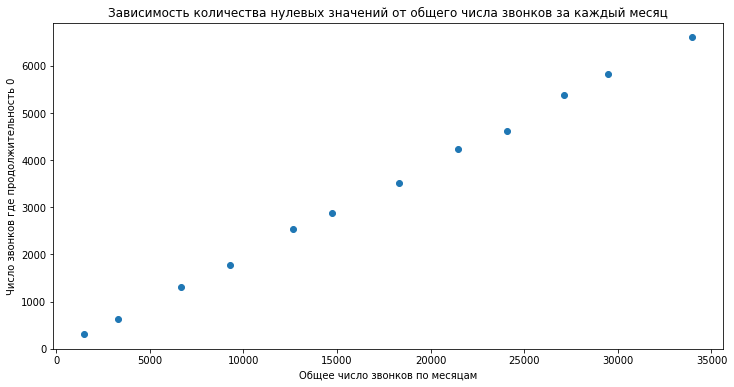

In [31]:
# построим график
plt.figure(figsize=(12, 6))
plt.scatter(null_calls["id"], null_calls["nulls"])
plt.title(
    "Зависимость количества нулевых значений от общего числа звонков за каждый месяц"
)
plt.xlabel("Общее число звонков по месяцам")
plt.ylabel("Число звонков где продолжительность 0")
plt.show()

На графике видно, что колличество звонков продолжительностью 0 постоянно, случайных выбросов нет.

Создадим таблицу состоящюю из суммы длительности звонков

In [32]:
pivot_calls = pd.pivot_table(
    calls, index=["user_id", "months"], values="duration", aggfunc=["sum", "count"],
)

In [33]:
pivot_calls.columns = ["sum", "count"]

In [34]:
pivot_calls.head(5)

sum  count
user_id months                
1000    2018-05-01  159     22
        2018-06-01  172     43
        2018-07-01  340     47
        2018-08-01  408     52
        2018-09-01  466     58

                                            Сообщения



Создадим таблицу состоящию из суммы отправленных сообщений

In [35]:
pivot_messages = pd.pivot_table(
    messages, index=["user_id", "months"], values="id", aggfunc="nunique"
)

In [36]:
pivot_messages.head(5)

id
user_id months        
1000    2018-05-01  22
        2018-06-01  60
        2018-07-01  75
        2018-08-01  81
        2018-09-01  57

                                            Интернет трафик

Посмотрим что это за абоненты, которые не пользуются интернетом, есть ли каке-то аномалии, случайны ли пропущенные значения или это ошибки. Для этого построим зависимость колличества интернет ссесий где длительность равна 0 мб от общего числа интернет сессий. 

In [37]:
# Посчитаем колличество нулевых сессий в месяц для этого создадим столбец если ссесии нет добавим 1
internet.loc[internet["mb_used"] == 0, "nulls"] = 1

In [38]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id,months,nulls
0,0,1000_0,112.949997,2018-11-25,1000,2018-11-01,NaN
1,1,1000_1,1052.810059,2018-09-07,1000,2018-09-01,NaN
2,2,1000_2,1197.260010,2018-06-25,1000,2018-06-01,NaN
3,3,1000_3,550.270020,2018-08-22,1000,2018-08-01,NaN
4,4,1000_4,302.559998,2018-09-24,1000,2018-09-01,NaN
...,...,...,...,...,...,...,...
149391,149391,1499_152,318.899994,2018-10-03,1499,2018-10-01,NaN
149392,149392,1499_153,490.130005,2018-12-14,1499,2018-12-01,NaN
149393,149393,1499_154,0.000000,2018-10-27,1499,2018-10-01,1.0
149394,149394,1499_155,1246.319946,2018-11-26,1499,2018-11-01,NaN


In [39]:
# Создадим сводную таблицу
null_internet = internet.pivot_table(
    index="months", values=["id", "mb_used"], aggfunc="count"
)

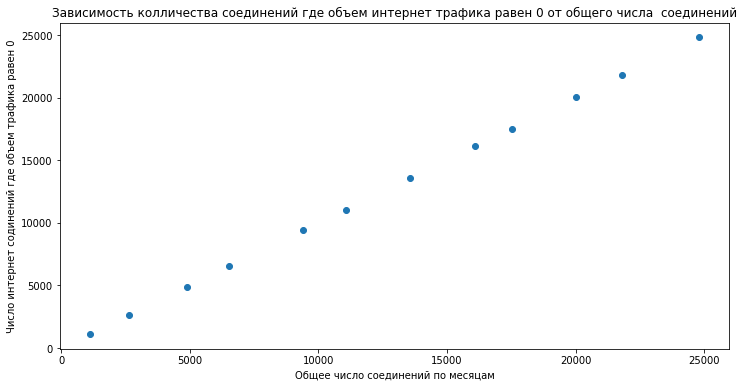

In [40]:
# построим график
plt.figure(figsize=(12, 6))
plt.scatter(null_internet["id"], null_internet["mb_used"])
plt.title(
    "Зависимость колличества соединений где объем интернет трафика равен 0 от общего числа  соединений"
)
plt.xlabel("Общее число соединений по месяцам")
plt.ylabel("Число интернет содинений где объем трафика равен 0")
plt.show()

На графике видно, что колличество интернет соединений где объем трафика равен 0 постоянно, случайных выбросов нет.

Создадим таблицу состоящюю из суммы колличеством израсходонного интернет трафика

In [41]:
pivot_internet = pd.pivot_table(
    internet, index=["user_id", "months"], values="mb_used", aggfunc="sum"
)

In [42]:
pivot_internet["mb_used"] = pivot_internet["mb_used"] / 1024
pivot_internet["mb_used"] = pivot_internet["mb_used"].apply(np.ceil)

In [43]:
pivot_internet.columns = ["gb_used"]

Избавися от вещественных данных

In [44]:
pivot_internet = pivot_internet.astype("int32")

In [45]:
pivot_internet.head(5)

gb_used
user_id months             
1000    2018-05-01        3
        2018-06-01       23
        2018-07-01       14
        2018-08-01       14
        2018-09-01       15

### 2.2 Группировка данных <a class="anchor" id="2.2"></a>

In [46]:
table = [pivot_calls, pivot_messages, pivot_internet]
grouped = reduce(
    lambda left, right: pd.merge(left, right, on=["user_id", "months"], how="outer"),
    table,
)

In [47]:
# поменяем название столбцов
grouped.columns = ["duration", "calls", "messages", "gb_used"]

In [48]:
# в пропущенных значениях поставми 0 так как абонент услугой не пользуется
grouped = grouped.fillna(0)

In [49]:
# преобразуем типы данных из object в int, почему-то reduce преоразует после себя все данные в object,
for i in ["duration", "calls", "messages", "gb_used"]:
    grouped[i] = grouped[i].astype("int32")

In [50]:
# проверим что все ок
grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, Timestamp('2018-05-01 00:00:00')) to (1476, Timestamp('2018-04-01 00:00:00'))
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  3214 non-null   int32
 1   calls     3214 non-null   int32
 2   messages  3214 non-null   int32
 3   gb_used   3214 non-null   int32
dtypes: int32(4)
memory usage: 80.2 KB


### 2.3 Расчет ежемесячной выручки <a class="anchor" id="2.3"></a>

In [51]:
# добавим наименование используемого тарифа для каждого пользователя
for user in grouped.index:
    grouped.loc[user, "tariff"] = users.loc[user[0] - 1000, "tariff"]

Создадим функцию для подсчета ежемесячной выручки 

In [52]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [53]:
def monthly_revenue(row):
    messages = row["messages"]
    gb_used = row["gb_used"]
    tariff = row["tariff"]
    duration = row["duration"]
    calls = row["calls"]

    if tariff == "smart":
        sum_duration = duration - tariffs.loc[0, "minutes_included"]
        sum_gb = gb_used - (tariffs.loc[0, "mb_per_month_included"] / 1024)
        sum_messages = messages - tariffs.loc[0, "messages_included"]

        if sum_duration < 0:
            sum_duration = 0
        if sum_gb < 0:
            sum_gb = 0
        if sum_messages < 0:
            sum_messages = 0

        return (
            tariffs.loc[0, "rub_per_message"] * sum_messages
            + (tariffs.loc[0, "rub_per_gb"]) * sum_gb
            + tariffs.loc[0, "rub_per_minute"] * sum_duration
            + tariffs.loc[0, "rub_monthly_fee"]
        )
    else:
        sum_duration = duration - tariffs.loc[1, "minutes_included"]
        sum_gb = gb_used - (tariffs.loc[1, "mb_per_month_included"] / 1024)
        sum_messages = messages - tariffs.loc[1, "messages_included"]

        if sum_duration < 0:
            sum_duration = 0
        if sum_gb < 0:
            sum_gb = 0
        if sum_messages < 0:
            sum_messages = 0

        return (
            tariffs.loc[1, "rub_per_message"] * sum_messages
            + (tariffs.loc[1, "rub_per_gb"]) * sum_gb
            + tariffs.loc[1, "rub_per_minute"] * sum_duration
            + tariffs.loc[1, "rub_monthly_fee"]
        )


grouped["revenue"] = grouped.apply(monthly_revenue, axis=1)

In [54]:
grouped.head(5)

duration  calls  messages  gb_used tariff  revenue
user_id months                                                        
1000    2018-05-01       159     22        22        3  ultra   1950.0
        2018-06-01       172     43        60       23  ultra   1950.0
        2018-07-01       340     47        75       14  ultra   1950.0
        2018-08-01       408     52        81       14  ultra   1950.0
        2018-09-01       466     58        57       15  ultra   1950.0

## 3.3 Анализ поведения абонентов мобильного оператора на тарифных планах "Смарт" и "Ультра"<a class="anchor" id="3"></a>

### 3.1 Колличество минут необходимое абоненту <a class="anchor" id="3.1"></a>

In [55]:
median_value = grouped.pivot_table(
    index="user_id",
    values=["duration", "messages", "gb_used", "revenue"],
    aggfunc="median",
)

Добавим в таблицу тарифный план для того что-бы потом посчитать дисперсию и среднее значение

In [56]:
for user_id in users["user_id"]:
    median_value.loc[user_id, "tariff"] = users.loc[user_id - 1000, "tariff"]
median_value.head(5)

,duration,gb_used,messages,revenue,tariff
user_id,,,,,
1000,339.0,14.5,65.0,1950.0,ultra
1001,422.0,16.0,0.0,850.0,smart
1002,214.0,18.0,11.0,1150.0,smart
1003,824.0,12.0,83.0,1950.0,ultra
1004,132.5,18.0,154.5,1950.0,ultra


### 3.2 Статистические показатели по тарифным планам "Смарт" и "Ультра" <a class="anchor" id="3.2"></a>

In [57]:
value_tariff = median_value.pivot_table(
    index=["tariff"],
    values=["duration", "gb_used", "messages"],
    aggfunc={
        "duration": [np.mean, np.var, np.std],
        "gb_used": [np.mean, np.var, np.std],
        "messages": [np.mean, np.var, np.std],
    },
)

value_tariff

duration                              gb_used                       \
              mean         std           var       mean       std        var   
tariff                                                                         
smart   437.468571  160.266622  25685.390127  16.927143  4.070437  16.568459   
ultra   557.503378  303.793641  92290.576519  20.317568  8.708653  75.840642   

         messages                          
             mean        std          var  
tariff                                     
smart   33.770000  28.010653   784.596662  
ultra   56.983108  49.236809  2424.263318

### 3.3 Гистограммы распределния <a class="anchor" id="3.3"></a>

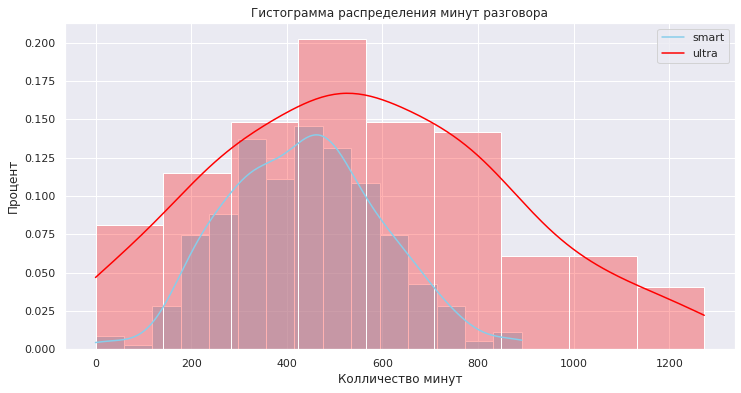

In [58]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    median_value.query("tariff == 'smart'")["duration"],
    color="skyblue",
    alpha=0.6,
    kde=True,
    stat="probability",
)
sns.histplot(
    median_value.query("tariff == 'ultra'")["duration"],
    color="red",
    alpha=0.3,
    kde=True,
    stat="probability",
)
plt.title("Гистограмма распределения минут разговора")
plt.xlabel("Колличество минут")
plt.ylabel("Процент")
plt.legend(["smart", "ultra"])
plt.show()

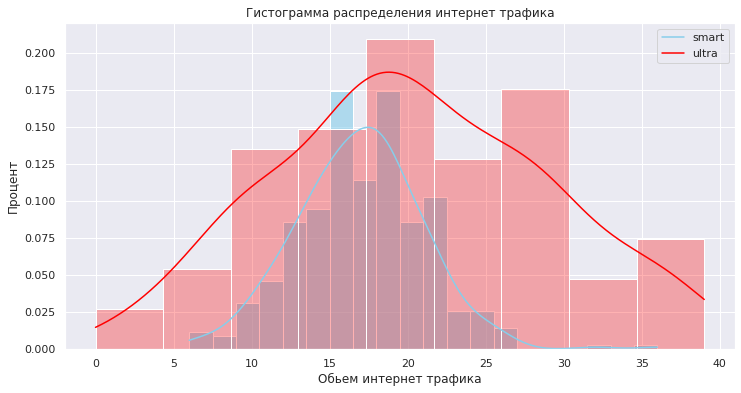

In [59]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    median_value.query("tariff == 'smart'")["gb_used"],
    color="skyblue",
    alpha=0.6,
    kde=True,
    stat="probability",
)
sns.histplot(
    median_value.query("tariff == 'ultra'")["gb_used"],
    color="red",
    alpha=0.3,
    kde=True,
    stat="probability",
)
plt.title("Гистограмма распределения интернет трафика")
plt.xlabel("Обьем интернет трафика")
plt.ylabel("Процент")
plt.legend(["smart", "ultra"])
plt.show()

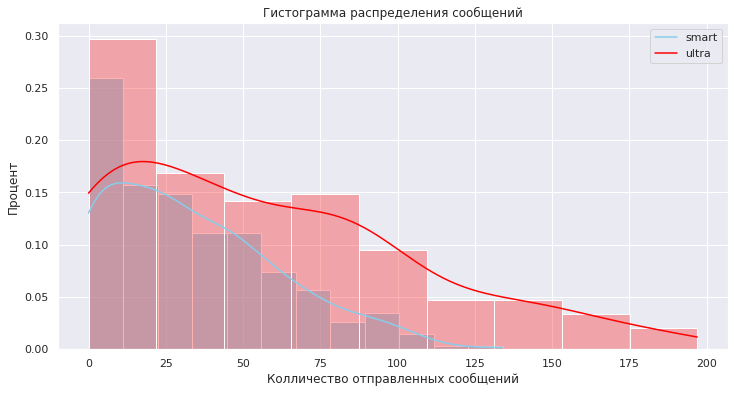

In [60]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    median_value.query("tariff == 'smart'")["messages"],
    color="skyblue",
    alpha=0.6,
    kde=True,
    stat="probability",
)
sns.histplot(
    median_value.query("tariff == 'ultra'")["messages"],
    color="red",
    alpha=0.3,
    kde=True,
    stat="probability",
)
plt.title("Гистограмма распределения сообщений")
plt.xlabel("Колличество отправленных сообщений")
plt.ylabel("Процент")
plt.legend(["smart", "ultra"])
plt.show()

### Вывод <a class="anchor" id="3.4"></a>

**Анализ минут и мегабайт**

Средние значения минут, мегабайт и сообщений на тарифе  "Смарт" меньше соответствующих средних значений на тарифе "Ультра" это говорит нам о том что пользователи тарифа "Ультра" тратят больше минут, мегабайт и сообщений.

На тарифе Смарт cреднее значение используемых минут, мегабайт, сообщений почти равно значениям включенным в тарифный план, за исключением сообщений. На тарифе **Ультра** средние значение используемых минут, мегабайт,  меньше соответствующих значений, включенных в тарифный план. Стандартное отклонение на тарифе "Смарт" меньше стандартного отклонения на тарифе "Ультра". Все это говорит нам о том, что пользователи на тарифе "Ультра" не следят за количеством истраченных минут, мегабайт, пользователи на тарифе "Смарт" стараются израсходовать все минуты, мегабайты включённые в пакет.


**Анализ сообщений**

Медиана равна стандартному отклонению это экспоненциальное распределение. Значит пользователи обоих тарифов не очень активно пользуются СМС. Пользователи на тарифе "Смарт" израсходуют сообщений больше чем предусмотренно тарифом. Пользователи тарифа "Ультра"  не израсходуют все сообщения включенные в тариф.

## 4. Проверка гипотез <a class="anchor" id="4"></a>

### 4.1 Гипотеза №1 "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" <a class="anchor" id="4.1"></a>

**Нулевая гипотеза** средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.

**Алтернативная гипотеза** средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна.


In [61]:
# создадим два DataFrame сгруппированных по тарифам
smart = grouped.query('tariff == "smart"')["revenue"]
ultra = grouped.query('tariff == "ultra"')["revenue"]

In [62]:
alpha = 0.05  # alpha выберем 0.5

results = st.ttest_ind(ultra, smart)

print("p-value:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


In [63]:
print('Средняя выручка на тарифе "Cмарт"', smart.median())
print('Средняя выручка на тарифе "Ультра"', ultra.median())

Средняя выручка на тарифе "Cмарт" 1023.0
Средняя выручка на тарифе "Ультра" 1950.0


Значит средняя выручка на тарифах "Смарт" и "Ультра" не равна. Средняя выручка по тарифу "Ультра" превышает в два раза выручку по тарифу смарт. Но вот что интересно средняя выручка по тарифу "Ультра" равна абонентской плате, то средняя выручка по тарифу смарт превышает абонентскую плату, значит скорее всего абонентам не хватает пакетов услуг включенных в тарифный план.

### 4.2 Гипотеза №2	"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" <a class="anchor" id="4.2"></a>

**Нулевая гипотеза** средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов

**Альтернативная гипотеза** средняя выручка пользователей из Москвы не равна средней выручки пользователем из других регионов

In [64]:
# в таблицу grouped добавим название населенных пунктов
for user in grouped.index:
    grouped.loc[user, "city"] = users.loc[user[0] - 1000, "city"]

In [65]:
# создадим два DataFreym сгруппированных по городам
moscow = grouped.query('city == "Москва"')["revenue"]
other_cities = grouped.query('city != "Москва"')["revenue"]

In [66]:
alpha = 0.05  # alpha выберем 0.5

results = st.ttest_ind(moscow, other_cities)

print("p-value:", results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


In [67]:
print("Средняя выручка по Москве:", moscow.median())
print("Средняя выручка по остальным регионам:", other_cities.median())

Средняя выручка по Москве: 1750.0
Средняя выручка по остальным регионам: 1583.0


Средняя выручка пользователей из Москвы почти равна средней выручке пользователей из других регионов.

## Вывод  <a class="anchor" id="5"></a>

- Средняя выручка с тарифа "Ультра" превышает среднею выручку на тарифе "Смарт" почти в два раза.
- Средняя выручка на тарифе "Ультра" равна ежемесячной плате за тариф, абоненты не расходуют сверх установленного на тарифе лимита по звонкам, сообщениям и интернет трафику.
- Средняя выручка на тарифе "Смарт" превышает ежемесячный платеж по тарифному плану на 68%, так абонентам данного тарифного плана не хватает минут, сообщений и интернет трафика включенного в тариф, как следствие абоненты приобретают дополнительные минуты, сообщения и мегабайты.
- Пользователи обоих тарифов не очень активно используют сообщения. 74 абонента (около 30%)  не отправляет сообщений.
- Средняя выручка пользователей из Москвы почти равна средней выручке пользователей из других регионов.